In [13]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Definimos el tamaño del gráfico

In [3]:
plt.rcParams['font.size'] = 15

Cargamos el Iris dataset de SKLearn

In [4]:
iris = datasets.load_iris()

In [5]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = pd.DataFrame(data=iris.target, columns=['species'])
data = pd.concat([data, target], axis=1)
data = data.sample(frac=1, random_state=1234)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


Separamos los conjuntos (entrenamiento y prueba)

In [6]:
Ntrain = int((data.shape[0]) * 0.8)
train = data.iloc[:Ntrain, :]
test = data.iloc[Ntrain:, :]

## **Regresión lineal**

Parámetros iniciales

In [7]:
plength = data['petal length (cm)']
pwlength = data['petal width (cm)']

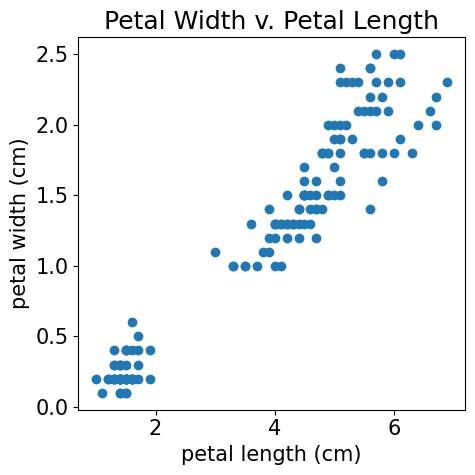

In [8]:
f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwlength)
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_title('Petal Width v. Petal Length')
f.tight_layout()

Ajustamos nuestro modelo a la forma a*x+b=y

In [9]:
model = linear_model.LinearRegression()

#Ajustamos los datos
model.fit(pd.DataFrame(train.iloc[:,2]), train.iloc[:,3])
print('Coeficiente (a): ', model.coef_)
print('Intercepto (b): ', model.intercept_)

Coeficiente (a):  [0.41490802]
Intercepto (b):  -0.357589314248546


#### a*x + b = 0.415*x - 0358 = y

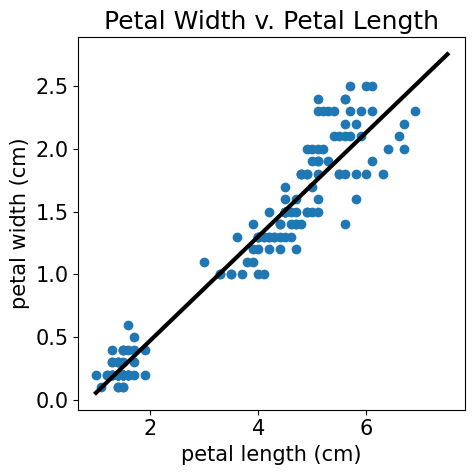

In [10]:
plength = data['petal length (cm)']
pwlength = data['petal width (cm)']

xvals = np.arange(plength.min(), plength.max()+1, 0.5)
yvals = model.coef_[0] * xvals + model.intercept_

f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwlength)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_title('Petal Width v. Petal Length')
f.tight_layout()

Verificamos el ajusto con las métricas de rendimiento: MSE (error cuadrático medio) y $R^2$

In [12]:
ypredict = model.predict(pd.DataFrame(test.iloc[:,2]))
mae = mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict)
r2 = r2_score(test.iloc[:,3], ypredict)
print('MAE: ', mae)
print('R2: ', r2)

MAE:  0.04313478323495432
R2:  0.9368389546540107
